# Weather Correlation

Nous allons étudier ici les corrélations entre les différents facteurs météo les jours précédents et le facteur de charge éoliens

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

In [3]:
#On récupère toutes les données nécessaire
from utility_tools import regroupement_data

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022,data_type="wind")
data_hToulouse_weather,data_dToulouse_weather=regroupement_data(data_path+'Data_Toulouse/Weather/',2000,2022,data_type="weather")

#print(data_hToulouse_weather.head())
print(data_dToulouse_weather.head())

Toutes les données sont différentes
Toutes les données sont différentes
                 t2m  prectotland  precsnoland    snomas      rhoa      swgdn  \
time                                                                            
2000-01-01  6.737042     0.042500     0.000000  0.003958  1.242750  38.081375   
2000-01-02  5.965833     0.003792     0.000083  0.002375  1.245000  51.991000   
2000-01-03  5.200500     0.000000     0.000000  0.001458  1.245375  88.566000   
2000-01-04  6.232792     0.002417     0.000000  0.000500  1.241250  76.269708   
2000-01-05  6.539917     0.001000     0.000000  0.000000  1.229042  58.826917   

                 swtdn    cldtot  
time                              
2000-01-01  133.232833  0.776667  
2000-01-02  133.868292  0.751958  
2000-01-03  134.533792  0.190292  
2000-01-04  135.276458  0.722792  
2000-01-05  136.074958  0.919750  


month  day
12     26     0.283665
       27     0.279244
       28     0.293127
       29     0.241680
       30     0.250356
       31     0.219791
1      1      0.247641
       2      0.296374
       3      0.242205
       4      0.246486
       5      0.234464
       6      0.252540
       7      0.231088
       8      0.233096
       9      0.207310
       10     0.231466
       11     0.242706
       12     0.228578
       13     0.263130
       14     0.271376
Name: electricity, dtype: float64
[0.23323865 0.23239784 0.23391071 0.23966611 0.24677865 0.25850069
 0.26240919 0.26298436 0.26489161 0.26139673 0.26214106 0.26235507
 0.26346595]


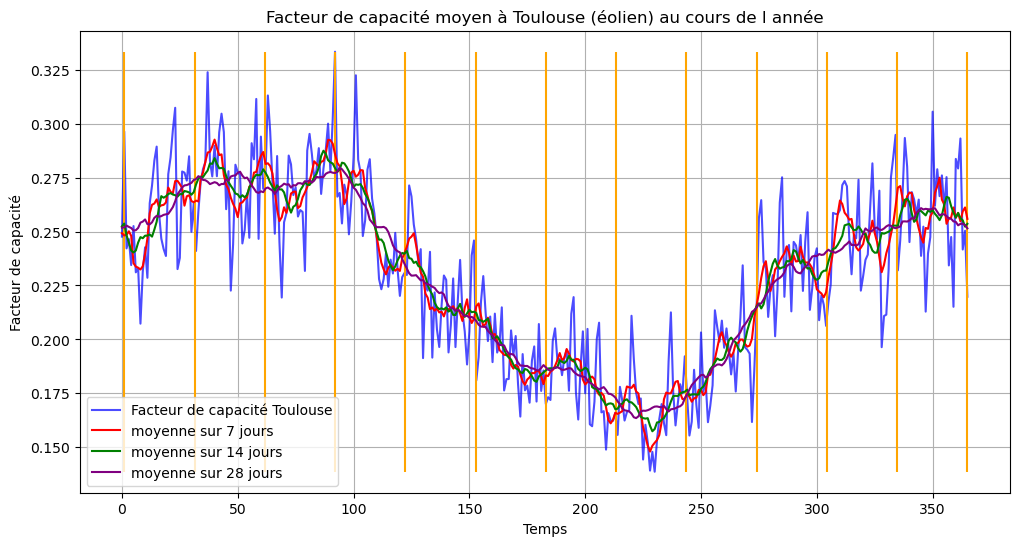

In [4]:
# On commence par regrouper les données par année
data_hour_copy=data_hToulouse_wind.copy()
data_hour_copy['day']=data_hour_copy['time'].dt.day
data_hour_copy['month']=data_hour_copy['time'].dt.month

data_year_wind_tendance = data_hour_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

#print(type(data_year_wind_tendance.index))



# Création du graphique de série temporelle pour la capacité nationale
plt.figure(figsize=(12, 6))
plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.title('Facteur de capacité moyen à Toulouse (éolien) au cours de l année')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.grid(True)

time_tick  = np.linspace(1, 365, 13)
plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")

print(pd.concat([data_year_wind_tendance['electricity'][360:],data_year_wind_tendance['electricity']])[:20])
print(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy()[:20][7:])

#On ajoute une "moyenne" en lissant
#On ajoute également des données avant et après pour avoir une moyenne lissée sur toute l'année

plt.plot(pd.concat([data_year_wind_tendance['electricity'][359:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:7]]).rolling(7, center=True).mean().to_numpy()[7:373], label=f"moyenne sur 7 jours", color = "red")
plt.plot(pd.concat([data_year_wind_tendance['electricity'][352:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:14]]).rolling(14, center=True).mean().to_numpy()[14:380], label=f"moyenne sur 14 jours", color = "green")
plt.plot(pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394], label=f"moyenne sur 28 jours", color = "purple")
plt.legend()

saison28=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]

plt.show()

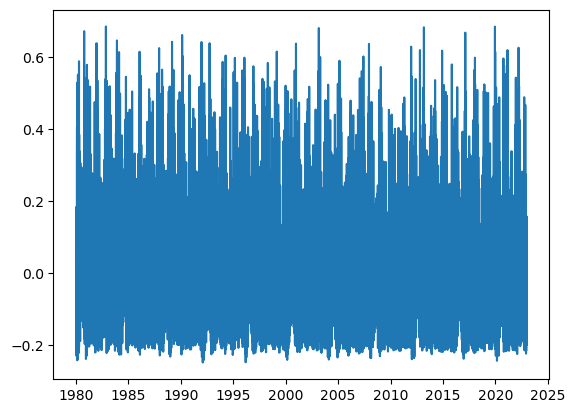

In [5]:
#Mise en forme des données

#Etant donné qu'on a pas soustrait la tendance pour calculer la saisonnalité jusqu'à maintenant, car on prend une tendance constante, je vais juste retirer la saisonnalité.


#On initialise les données
data_day_season=data_dToulouse_wind.copy()
bissextile=4

for i in range(43): #On parcourt nos 43 années de données
    
    if bissextile == 4 : #Si année bissextile
        tend=saison28
        bissextile=0
    else:
        tend=saison28[~59]
        
    #print(1980+i,int(0.75+i*365.25),int(0.75+(i+1)*365.25))
    data_day_season['electricity'].iloc[int(0.75+i*365.25):int(0.75+(i+1)*365.25)]=data_day_season['electricity'].iloc[int(0.75+i*365.25):int(0.75+(i+1)*365.25)]-tend
    
    bissextile += 1

    
plt.plot(data_day_season['electricity'])

In [6]:
df_merged = pd.merge(data_day_season, data_dToulouse_weather, left_index=True, right_index=True)

correlation_matrix = df_merged.corr()
print(correlation_matrix['electricity'])

electricity    1.000000
wind_speed     0.983045
t2m           -0.181958
prectotland    0.291320
precsnoland    0.095287
snomas         0.063451
rhoa           0.133896
swgdn         -0.232238
swtdn         -0.125191
cldtot         0.230102
Name: electricity, dtype: float64


In [39]:
print(df_merged.head())

#On construit un dataframe avec les données décalés d'une journée
df_oneday = df_merged.shift(1)
#print(df_oneday.head())

df_merged_oneday = pd.merge(df_merged, df_oneday, left_index=True, right_index=True)

print(df_merged_oneday.head())



            electricity  wind_speed       t2m  prectotland  precsnoland  \
time                                                                      
2000-01-01    -0.184593    3.991417  6.737042     0.042500     0.000000   
2000-01-02    -0.211278    3.564625  5.965833     0.003792     0.000083   
2000-01-03    -0.099264    5.238458  5.200500     0.000000     0.000000   
2000-01-04    -0.219567    3.373417  6.232792     0.002417     0.000000   
2000-01-05    -0.126986    4.738583  6.539917     0.001000     0.000000   

              snomas      rhoa      swgdn       swtdn    cldtot  
time                                                             
2000-01-01  0.003958  1.242750  38.081375  133.232833  0.776667  
2000-01-02  0.002375  1.245000  51.991000  133.868292  0.751958  
2000-01-03  0.001458  1.245375  88.566000  134.533792  0.190292  
2000-01-04  0.000500  1.241250  76.269708  135.276458  0.722792  
2000-01-05  0.000000  1.229042  58.826917  136.074958  0.919750  
            

In [8]:
correlation_matrix2 = df_merged_oneday.corr()
print(correlation_matrix2['electricity_x'])

electricity_x    1.000000
wind_speed_x     0.983045
t2m_x           -0.181958
prectotland_x    0.291320
precsnoland_x    0.095287
snomas_x         0.063451
rhoa_x           0.133896
swgdn_x         -0.232238
swtdn_x         -0.125191
cldtot_x         0.230102
electricity_y    0.449796
wind_speed_y     0.429572
t2m_y           -0.159548
prectotland_y    0.206321
precsnoland_y    0.082149
snomas_y         0.047719
rhoa_y           0.099542
swgdn_y         -0.189435
swtdn_y         -0.127617
cldtot_y         0.208275
Name: electricity_x, dtype: float64


### ARIMAX sur les données

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler

In [40]:
# Sélectionner les variables exogènes spécifiques et la variable cible
#variables_exogenes = ['wind_speed_y', 'electricity_y', 't2m_y', 'prectotland_y','swgdn_y','swtdn_y','cldtot_y']
variables_exogenes = ['wind_speed_y', 't2m_y', 'prectotland_y','swgdn_y','swtdn_y','cldtot_y']
df_for_arimax = df_merged_oneday[['electricity_x'] + variables_exogenes]

# Initialisation du StandardScaler
scaler = StandardScaler()

# Ajustement et transformation des données
# Cela calcule la moyenne et l'écart type et transforme les données
df_for_arimax[variables_exogenes] = pd.DataFrame(scaler.fit_transform(df_for_arimax[variables_exogenes]), columns=df_for_arimax[variables_exogenes].columns, index=df_for_arimax[variables_exogenes].index)

# Définir la date de coupure entre les données d'entraînement et de test
split_date = pd.Timestamp('2021-12-31')

# Diviser les données en ensembles d'entraînement et de test
train = df_for_arimax.loc[pd.Timestamp('2000-01-02'):split_date]
test = df_for_arimax.loc[split_date + pd.Timedelta(days=1):]

# Extraire les variables dépendantes et indépendantes pour l'entraînement et le test
y_train = train['electricity_x']
X_train = train[variables_exogenes]

y_test = test['electricity_x']
X_test = test[variables_exogenes]

C:\Users\piotd\AppData\Local\Temp\ipykernel_21516\3672291249.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_arimax[variables_exogenes] = pd.DataFrame(scaler.fit_transform(df_for_arimax[variables_exogenes]), columns=df_for_arimax[variables_exogenes].columns, index=df_for_arimax[variables_exogenes].index)


In [41]:
import statsmodels.api as sm
p = 1
d = 0
q = 3


# Ajustement du modèle ARIMAX avec les variables exogènes choisies
model = sm.tsa.ARIMA(endog=y_train, exog=X_train[variables_exogenes], order=(p, d, q))
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())

# Prédictions avec les variables exogènes
predictions = results.get_forecast(steps=len(y_test), exog=X_test[variables_exogenes])
predicted_means = predictions.predicted_mean
predicted_intervals = predictions.conf_int()

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          electricity_x   No. Observations:                 8035
Model:                 ARIMA(1, 0, 3)   Log Likelihood                4554.443
Date:                Thu, 21 Mar 2024   AIC                          -9084.885
Time:                        00:26:53   BIC                          -9000.987
Sample:                    01-02-2000   HQIC                         -9056.174
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0130      0.006     -2.017      0.044      -0.026      -0.000
wind_speed_y     -0.0281      0.007     -3.918      0.000      -0.042      -0.014
t2m_y            -0.0062      0.005     

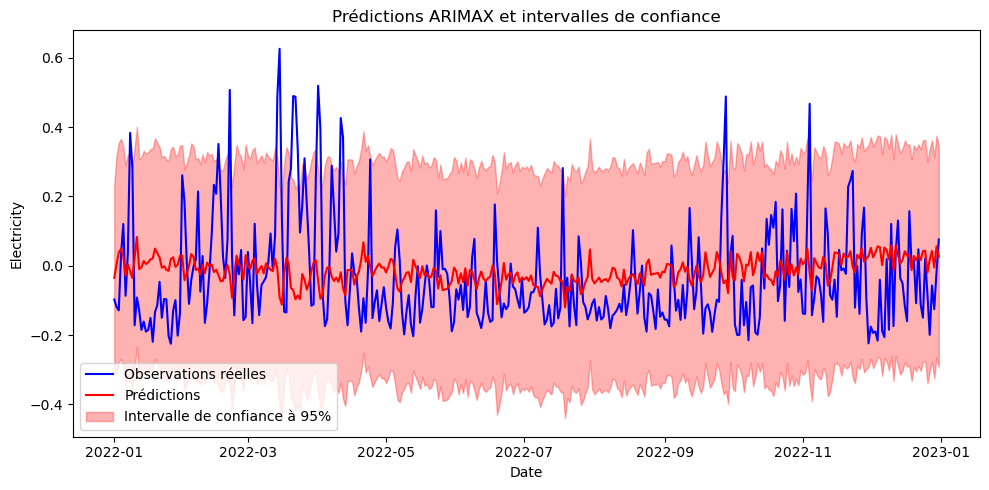

In [42]:
# Prédictions  en se basant uniquement sur les données météo
predicted_means = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Dates de l'ensemble de test - pour l'axe des x
dates = y_test.index

# Tracer les observations réelles
plt.figure(figsize=(10,5))
plt.plot(dates, y_test, label='Observations réelles', color='blue')

# Tracer les prédictions moyennes
plt.plot(dates, predicted_means, label='Prédictions', color='red')

# Tracer les intervalles de confiance
plt.fill_between(dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.3, label='Intervalle de confiance à 95%')

# Personnaliser le graphique
plt.title('Prédictions ARIMAX et intervalles de confiance')
plt.xlabel('Date')
plt.ylabel('Electricity')
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
assert len(predicted_means) == len(y_test), "La longueur des prédictions et des valeurs réelles doit être identique."

# Calculer les métriques
mse = mean_squared_error(y_test, predicted_means)
mae = mean_absolute_error(y_test, predicted_means)
rmse = np.sqrt(mse)  # RMSE est simplement la racine carrée de MSE
r2 = r2_score(y_test, predicted_means)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 0.026867089064843495
MAE: 0.12609265315080406
RMSE: 0.16391183320567035
R²: -0.14321680281821525


Pour rappel, avec la modélisation ARMA, on avait obtenu le sveleurs des métriques suivantes :

    MSE: 0.01718373288815149

    MAE: 0.10142474638483692

    RMSE: 0.13108673803307294

    R²: 0.2688179904617741



In [44]:
# Diviser les données en ensembles d'entraînement et de test
train = df_for_arimax.loc[pd.Timestamp('2000-01-02'):]
test = df_for_arimax.loc[split_date + pd.Timedelta(days=1):]

# Extraire les variables dépendantes et indépendantes pour l'entraînement et le test
y_train = train['electricity_x']
X_train = train[variables_exogenes]


import statsmodels.api as sm
p = 1
d = 0
q = 3


# Ajustement du modèle ARIMAX avec les variables exogènes choisies
model = sm.tsa.ARIMA(endog=y_train, exog=X_train[variables_exogenes], order=(p, d, q))
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())



C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:          electricity_x   No. Observations:                 8400
Model:                 ARIMA(1, 0, 3)   Log Likelihood                4794.053
Date:                Thu, 21 Mar 2024   AIC                          -9564.105
Time:                        00:29:17   BIC                          -9479.674
Sample:                    01-02-2000   HQIC                         -9535.276
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0137      0.004     -3.088      0.002      -0.022      -0.005
wind_speed_y     -0.0533      0.006     -8.369      0.000      -0.066      -0.041
t2m_y            -0.0122      0.005     

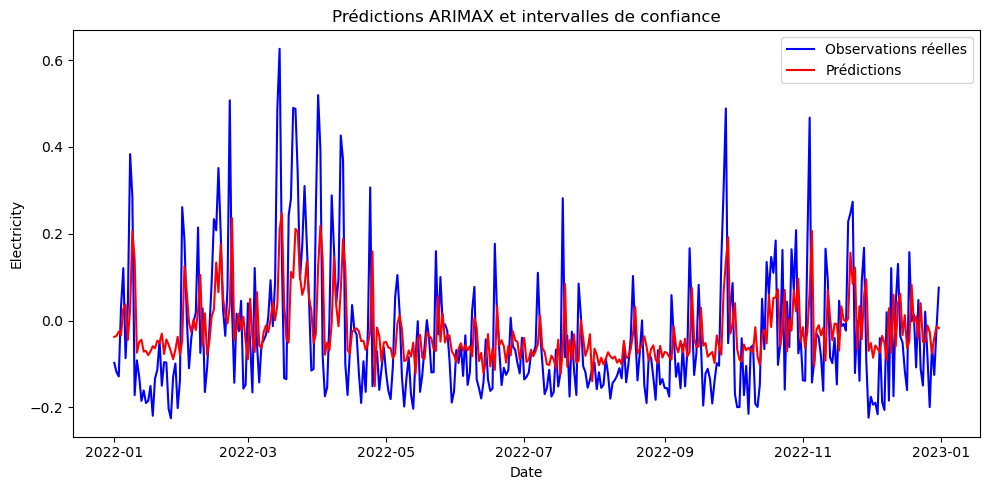

In [45]:
# Prédictions avec les variables exogènes
predictions = results.predict(steps=len(y_test), start=split_date+ pd.Timedelta(days=1))

# Dates de l'ensemble de test - pour l'axe des x
dates = y_test.index

# Tracer les observations réelles
plt.figure(figsize=(10,5))
plt.plot(dates, y_test, label='Observations réelles', color='blue')

# Tracer les prédictions moyennes
plt.plot(dates, predictions, label='Prédictions', color='red')

# Personnaliser le graphique
plt.title('Prédictions ARIMAX et intervalles de confiance')
plt.xlabel('Date')
plt.ylabel('Electricity')
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
assert len(predicted_means) == len(y_test), "La longueur des prédictions et des valeurs réelles doit être identique."

# Calculer les métriques
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE est simplement la racine carrée de MSE
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 0.017222748862931906
MAE: 0.09947383763611066
RMSE: 0.13123547105463487
R²: 0.2671578285499402


Pour rappel, avec la modélisation ARMA, on avait obtenu le sveleurs des métriques suivantes :

    MSE: 0.01718373288815149

    MAE: 0.10142474638483692

    RMSE: 0.13108673803307294

    R²: 0.2688179904617741


### Essai avec Arimax et "Elecctricity_y"

In [47]:
# Sélectionner les variables exogènes spécifiques et la variable cible
#variables_exogenes = ['wind_speed_y', 'electricity_y', 't2m_y', 'prectotland_y','swgdn_y','swtdn_y','cldtot_y']
variables_exogenes = ['wind_speed_y', 't2m_y', 'prectotland_y','swgdn_y','swtdn_y','cldtot_y','electricity_y']
df_for_arimax = df_merged_oneday[['electricity_x'] + variables_exogenes]

# Initialisation du StandardScaler
scaler = StandardScaler()

# Ajustement et transformation des données
# Cela calcule la moyenne et l'écart type et transforme les données
df_for_arimax[variables_exogenes] = pd.DataFrame(scaler.fit_transform(df_for_arimax[variables_exogenes]), columns=df_for_arimax[variables_exogenes].columns, index=df_for_arimax[variables_exogenes].index)

# Définir la date de coupure entre les données d'entraînement et de test
split_date = pd.Timestamp('2021-12-31')

# Diviser les données en ensembles d'entraînement et de test
train = df_for_arimax.loc[pd.Timestamp('2000-01-02'):split_date]
test = df_for_arimax.loc[split_date + pd.Timedelta(days=1):]

# Extraire les variables dépendantes et indépendantes pour l'entraînement et le test
y_train = train['electricity_x']
X_train = train[variables_exogenes]

y_test = test['electricity_x']
X_test = test[variables_exogenes]

C:\Users\piotd\AppData\Local\Temp\ipykernel_21516\4049267526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_arimax[variables_exogenes] = pd.DataFrame(scaler.fit_transform(df_for_arimax[variables_exogenes]), columns=df_for_arimax[variables_exogenes].columns, index=df_for_arimax[variables_exogenes].index)


In [48]:
p = 1
d = 0
q = 3


# Ajustement du modèle ARIMAX avec les variables exogènes choisies
model = sm.tsa.ARIMA(endog=y_train, exog=X_train[variables_exogenes], order=(p, d, q))
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())

# Prédictions avec les variables exogènes
predictions = results.get_forecast(steps=len(y_test), exog=X_test[variables_exogenes])
predicted_means = predictions.predicted_mean
predicted_intervals = predictions.conf_int()

C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\piotd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          electricity_x   No. Observations:                 8035
Model:                 ARIMA(1, 0, 3)   Log Likelihood                4613.760
Date:                Thu, 21 Mar 2024   AIC                          -9201.519
Time:                        00:31:45   BIC                          -9110.629
Sample:                    01-02-2000   HQIC                         -9170.416
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0135      0.002     -6.692      0.000      -0.017      -0.010
wind_speed_y     -0.0848      0.010     -8.534      0.000      -0.104      -0.065
t2m_y            -0.0150      0.003     

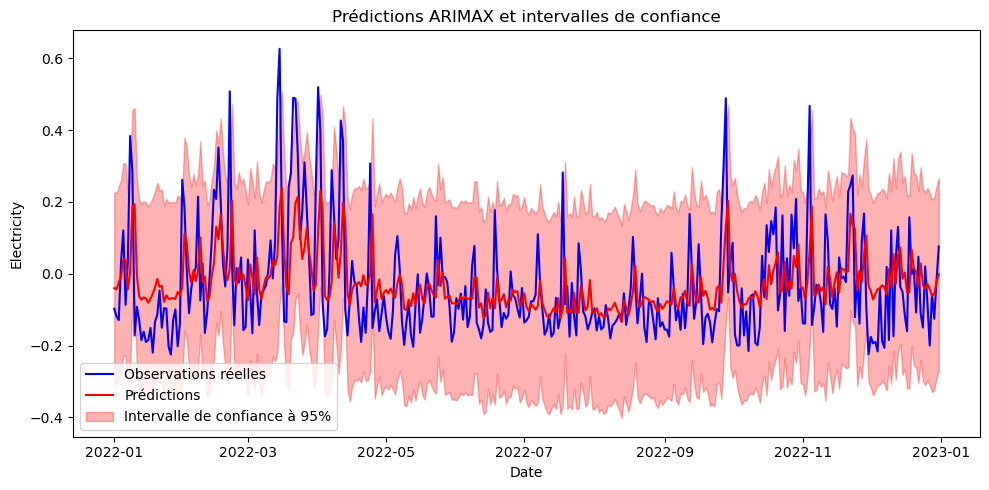

In [49]:
# Prédictions  en se basant uniquement sur les données météo
predicted_means = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Dates de l'ensemble de test - pour l'axe des x
dates = y_test.index

# Tracer les observations réelles
plt.figure(figsize=(10,5))
plt.plot(dates, y_test, label='Observations réelles', color='blue')

# Tracer les prédictions moyennes
plt.plot(dates, predicted_means, label='Prédictions', color='red')

# Tracer les intervalles de confiance
plt.fill_between(dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.3, label='Intervalle de confiance à 95%')

# Personnaliser le graphique
plt.title('Prédictions ARIMAX et intervalles de confiance')
plt.xlabel('Date')
plt.ylabel('Electricity')
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()

In [50]:
# Calculer les métriques
mse = mean_squared_error(y_test, predicted_means)
mae = mean_absolute_error(y_test, predicted_means)
rmse = np.sqrt(mse)  # RMSE est simplement la racine carrée de MSE
r2 = r2_score(y_test, predicted_means)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 0.0172883998180838
MAE: 0.09799844835901546
RMSE: 0.13148535971005973
R²: 0.26436432625166106
